# Bài tập về nhà Decision Tree, Random Forest


- Thực hiện các yêu cầu dưới đây với tập dữ liệu Australian credit
- Down dữ liệu tại đường link dưới đây và đặt vào folder /data
 
  https://archive.ics.uci.edu/ml/datasets/Statlog+(Australian+Credit+Approval)
    

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


random_state = 0

## 1. Tìm hiểu dữ liệu

In [10]:
'''
- Tìm hiểu cấu trúc data tại trang web UCI
- Down các files, đặt trong folder data/
- Chú ý:
    - Đọc mô tả dữ liệu trong file 'australian.doc'
    - Kiểm tra DecisionTree/RandomForest của Sklearn có hỗ trợ với kiểu dữ liệu được cung cấp không
'''


data_path = './data/australian.dat'

columns = [
    'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 
    'A11', 'A12', 'A13', 'A14', 'Class'
]

df = pd.read_csv(data_path, delim_whitespace=True, header=None, names=columns)


print(df.head())
print(df.info())

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

max_depth_values = range(1, 21)

decision_tree_accuracies = []

   A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13   A14  \
0   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2  100  1213   
1   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2  160     1   
2   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2  280     1   
3   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2    0     1   
4   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   60   159   

   Class  
0      0  
1      0  
2      0  
3      1  
4      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8

C:\Users\ACER\AppData\Local\Temp\ipykernel_1196\1899043285.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_path, delim_whitespace=True, header=None, names=columns)


## 2. Decision Tree

### 2.1. Khảo sát các giá trị khác nhau của max_depth

[0.8913043478260869, 0.8913043478260869, 0.8623188405797102, 0.8768115942028986, 0.855072463768116, 0.8405797101449275, 0.8260869565217391, 0.8260869565217391, 0.8188405797101449, 0.7971014492753623, 0.8043478260869565, 0.8043478260869565, 0.8043478260869565, 0.8043478260869565, 0.8043478260869565, 0.8043478260869565, 0.8043478260869565, 0.8043478260869565, 0.8043478260869565, 0.8043478260869565]


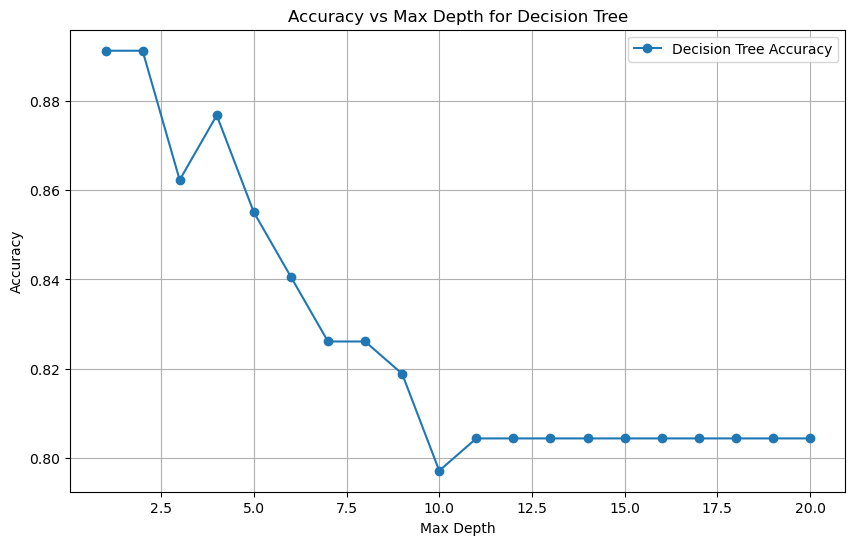

In [11]:
# code
for max_depth in max_depth_values:
    
    decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    decision_tree.fit(X_train, y_train)
    y_pred_tree = decision_tree.predict(X_test)
    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    decision_tree_accuracies.append(accuracy_tree)
print(decision_tree_accuracies)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, decision_tree_accuracies, label='Decision Tree Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

### 2.2. Tìm kiếm siêu tham số

In [ ]:
#code

## 3. Random Forest

### 3.1 Khảo sát các giá trị khác nhau của n_estimators

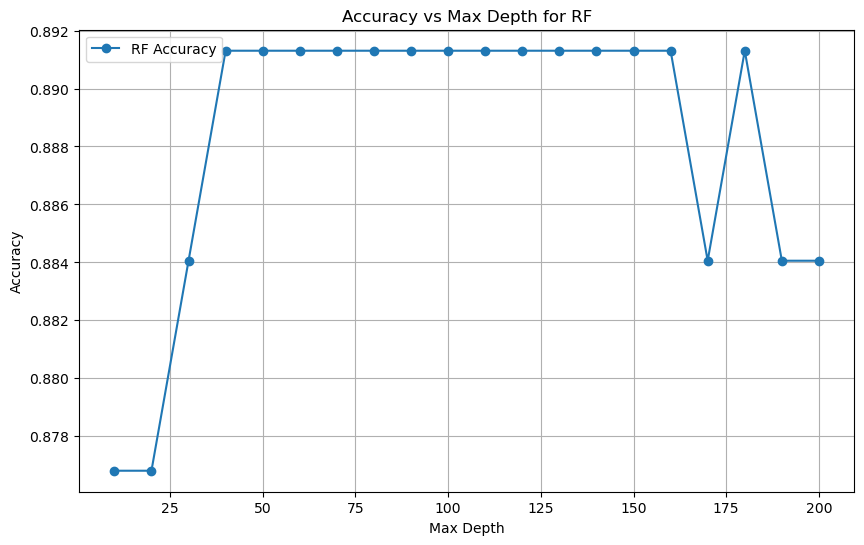

In [12]:
#code
n_estimators_values = range(10, 201, 10) 
random_forest_accuracies = []

for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    random_forest_accuracies.append(accuracy)
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values , random_forest_accuracies, label='RF Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for RF')
plt.legend()
plt.grid(True)
plt.show()

### 3.2 Tìm kiếm siêu tham số

In [ ]:
# code